In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Intro kansrekenen
Basis kansrekenen $P(C_i | \mathbf{x})$:
- Hierbij is $C_i$ de class $i$ en $\mathbf{x}$ een record (rij) uit een dataset (tabel).
- Gegeven $\mathbf{x}$, wat is de kans dat $\mathbf{x}$ tot de klasse $C_i$ behoort?
- Voorbeeld binair geval -> 2 classes $C_1$ en $C_2$
- Als $y = P(C_1 | \mathbf{x})$, dan is $1-y = P(C_2 | \mathbf{x})$
- *Normaliter* kiezen we $C_1$ als $y > 0.5$, en anders kiezen we $C_2$.

ODDS:
- ratio tussen $P(C_1 | \mathbf{x})$ en $P(C_2 | \mathbf{x})$
- 
$$
    ODDS = \dfrac{y}{1-y} = \dfrac{P(C_1 | \mathbf{x})}{1 - P(C_1 | \mathbf{x})} = \dfrac{P(C_1 | \mathbf{x})}{P(C_2 | \mathbf{x})}
$$
- Andere woorden: ratio tussen kans op positief/true/1 en negatief/false/0
- Ratio tussen hoevaak iets **wel** heeft voorgedaan en hoevaak iets **niet** heeft voorgedaan. 
- e.g., "The odds of rolling a 6 is 1 to 5 (abbreviated 1:5)."
\begin{align*}
    ODDS_{\text{6 gooien}} &= \dfrac{P(\text{6 gooien})}{1-P(\text{6 gooien})} = \dfrac{1/6}{1-(1/6)} = 1/5\\[2em]
    P(\text{6 gooien}) &= \dfrac{ODDS}{1+ODDS} = \dfrac{1/5}{1+(1/5)} = 1/6
\end{align*}

In [19]:
kans_op_succes = 0.8
odds = kans_op_succes/(1-kans_op_succes)
odds # 4x meer waarschijnlijk op succes

4.000000000000001

### Logit

log odds
$$
    \text{logit}(x) = \log \left(\dfrac{x}{1-x}\right)
$$
Input: kanswaarde
 
Output waarschijnlijkheid als numerieke waarde

Waarom log odds (logit)?
- Odds gedefinieerd op het domein $(0, \infty)$
- Log odds gedefinieerd op het domein $(-\infty, \infty)$
- Dit maakt de wiskunde wat makkelijker als de input lineaire regressie is

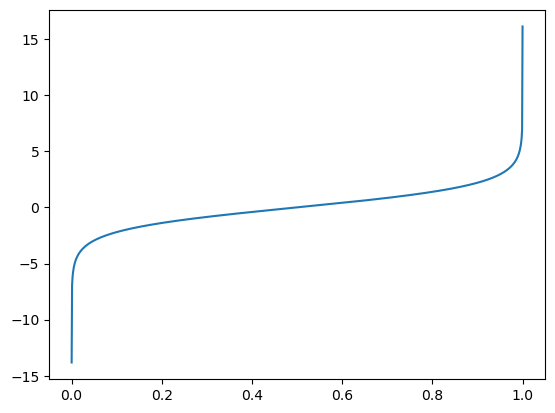

In [17]:
def logit(x: np.ndarray):
    return np.log(x/(1-x))

X_range = np.linspace(1e-6, 0.9999999, 1000)
logits = logit(X_range)

sns.lineplot(x=X_range, y=logits)
plt.show()

### Logistic Regression

Logit stuurt een kanswaarde $P(C_i|\mathbf{x})$ naar een numerieke waarde. 

Het **tegenovergestelde** van logit stuurt een numerieke waarde naar het **domein** van kanswaardes.
$$
    \text{sigmoid}(x) = \dfrac{1}{1+e^{-x}}
$$

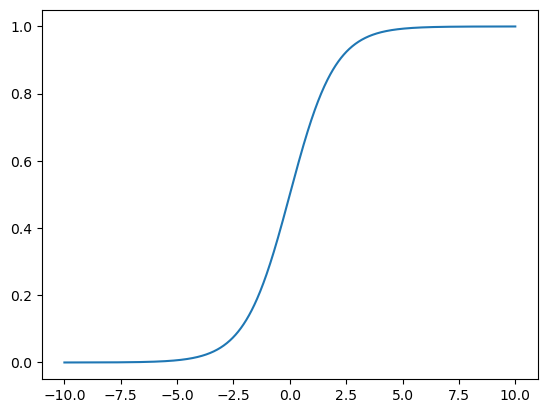

In [24]:
def sigmoid(x: np.ndarray):
    return 1/(1+np.exp(-x))

X_range = np.linspace(-10, 10, 1000)
y = sigmoid(X_range)

sns.lineplot(x=X_range, y=y)
plt.show()

Logistic regression
- Combinatie van inverse logit (sigmoid) en lineare regressie
\begin{align*}
    \hat{y} &= \text{sigmoid}(w_0 + w_1 x_1 + w_2 x_2 + \dots + w_d x_d)\\[1em]
    \hat{y} &= \dfrac{1}{1+e^{-(w_0 + w_1 x_1 + w_2 x_2 + \dots + w_d x_d)}}
\end{align*}
- Lineare transformatie $g(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$ (standaard regressie in matrix-vector vorm)
- Sigmoid voegt hier een niet-lineaire transformatie aan toe

<Axes: >

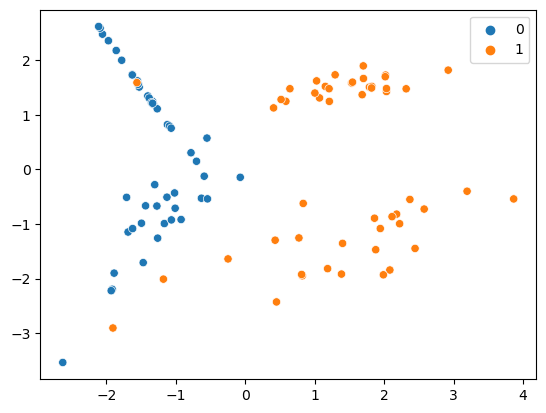

In [16]:
from sklearn.datasets import make_classification

X, Y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    class_sep=1.5
)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)

$$
    C_1 = \begin{cases} 1 & g(x) > 0\\ 0 & \text{otherwise} \end{cases}
$$

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X, Y)

# g(x) > 0 --> class 1, otherwise 0
acc_skl = np.sum((lda.decision_function(X) > 0)*1 == Y) / len(Y)

acc_diy = np.sum(((lda.coef_ @ X.T + lda.intercept_) > 0)*1 == Y) / len(Y)

print(f"{acc_skl=}, {acc_diy=}")

acc_skl=0.96, acc_diy=0.96


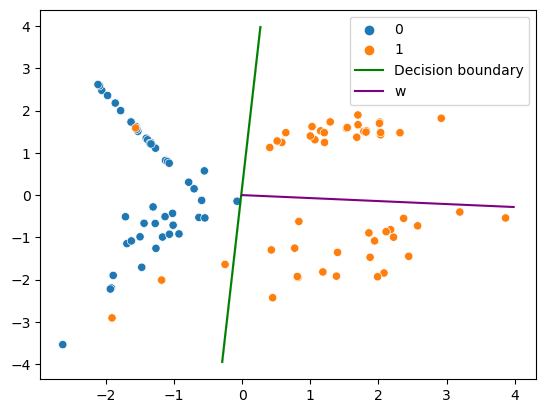

In [20]:
# create cartesian product to find decision boundary
xrange = np.linspace(-4.0, 4.0, 1000)
xx, yy = np.meshgrid(xrange, xrange)
D = np.array([xx.ravel(), yy.ravel()])
D.T

# boundary is when g(x) is almost 0
boundary = D[:, (np.abs(lda.coef_ @ D + lda.intercept_) < 0.01).ravel()]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
sns.lineplot(x=boundary[0, :], y=boundary[1, :], c='g', label="Decision boundary")

sns.lineplot(x=[0, lda.coef_[0, 0]], y=[0, lda.coef_[0, 1]], c='purple', label="w")
plt.legend()

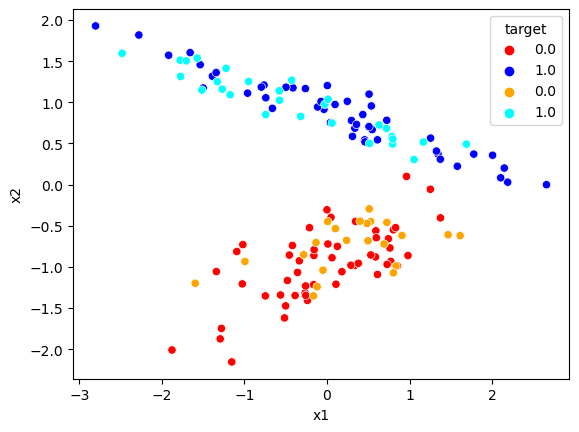

In [96]:
from sklearn.datasets import make_classification

X, Y = make_classification(
    n_samples=150, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.8
)

# normalize so that mean zero and unit variance
X = (X - X.mean(axis=0))/X.std(axis=0)

# train/val split
X_val = X[:50, :]
X = X[50:, :]

Y_val = Y[:50]
Y = Y[50:]

train_set = pd.DataFrame(np.concatenate([X, Y[..., None]], axis=1), columns=['x1', 'x2', 'target'])
val_set = pd.DataFrame(np.concatenate([X_val, Y_val[..., None]], axis=1), columns=['x1', 'x2', 'target'])

train = sns.scatterplot(train_set, x='x1', y='x2', hue='target', palette=['r', 'b'])
val = sns.scatterplot(val_set, x='x1', y='x2', hue='target', palette=['orange', 'cyan'])

Text(950, 2.832972048962205, '0.83')

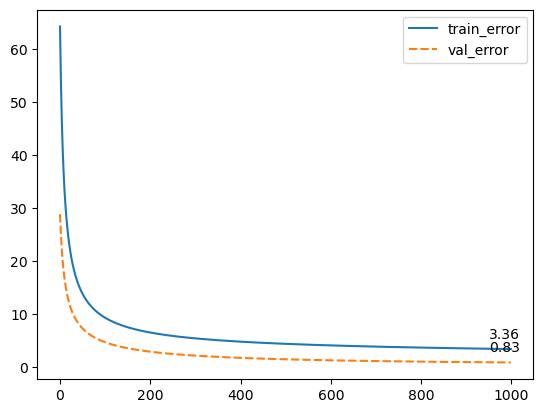

In [97]:
sigmoid = lambda y: 1/(1+np.exp(-y))

# parameters initialised uniformly
w = np.random.uniform(-0.3, 0.3, size=(2, 1))
w0 = np.random.uniform(-0.3, 0.3, size=(1, 1))

# learning rate
lr = 0.003
# number of training epochs
EPOCHS = 1000

# target
y = Y[..., None]
y_val = Y_val[..., None]

history = []

for _ in range(EPOCHS):
    # same as w.T @ X.T + w0 but shape is (1, 100)
    y_pred = sigmoid(X @ w + w0)
    
    # cross entropy error
    train_error = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

    # update via gradient descent
    for i in range(w.shape[0]):
        wj = lr * np.sum((y - y_pred) * X[:, i][..., None])
        w[i, 0] += wj

    w0 += lr * np.sum((y - y_pred))

    val_pred = sigmoid(X_val @ w + w0)
    val_error = -np.sum(y_val * np.log(val_pred) + (1-y_val) * np.log(1-val_pred))

    history.append([train_error, val_error])

history = pd.DataFrame(history, columns=["train_error", "val_error"])

ax = sns.lineplot(history)
last_train_error = history.iloc[-1, 0]
ax.text(EPOCHS-50, last_train_error+2, f"{last_train_error:.2f}")
last_val_error = history.iloc[-1, 1]
ax.text(EPOCHS-50, last_val_error+2, f"{last_val_error:.2f}")

In [100]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000).fit(X, Y)

print("Sklearn gewichten:        ", log_reg.coef_.ravel(), log_reg.intercept_)
print("Do-it-yourself gewichten: ", w.ravel(), w0.ravel())

Sklearn gewichten:         [0.66081994 3.52034585] [-0.35153929]
Do-it-yourself gewichten:  [1.21053564 6.54571565] [-1.15438954]


In [101]:
val_pred = log_reg.predict_proba(X_val)[:, 1][..., None]
val_error = -np.sum(y_val * np.log(val_pred) + (1-y_val) * np.log(1-val_pred))

print("Sklearn validation error:        ", val_error)
print("Do-it-yourself validation error: ", history.iloc[-1, 1])

Sklearn validation error:         4.207737341676909
Do-it-yourself validation error:  0.8329720489622048


## Afstandsmetrieken

In [102]:
from sklearn.metrics import DistanceMetric

X = np.array([
    [1,3,2], 
    [2,5,1], 
    [3,7,5], 
    [4,5,8]
])
X

array([[1, 3, 2],
       [2, 5, 1],
       [3, 7, 5],
       [4, 5, 8]])

### Euclidean distance
$$
    d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i=1}^N (a_i - b_i)^2}
$$

In [108]:
# insert new dimension X[..., None]: shape (4, 3, 1)
# its transpose X[..., None].T: shape (1, 3, 4)
# broadcast: (4, 3, 1) - (1, 3, 4) = (4, 3, 4)
# sum over dimension one: (4, 3, 4) -> (4, 4)

np.sum((X[..., None] - X[..., None].T)**2, axis=(1))**0.5

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

In [109]:
dist = DistanceMetric.get_metric('euclidean')

dist.pairwise(X, X)

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

### Manhatten distance

$$
    d(\mathbf{a}, \mathbf{b}) = \sum_{i=1}^N |a_i - b_i|
$$

In [110]:
np.sum(np.abs(X[..., None] - X[..., None].T), axis=(1))

array([[ 0,  4,  9, 11],
       [ 4,  0,  7,  9],
       [ 9,  7,  0,  6],
       [11,  9,  6,  0]])

In [111]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(X, X)

array([[ 0.,  4.,  9., 11.],
       [ 4.,  0.,  7.,  9.],
       [ 9.,  7.,  0.,  6.],
       [11.,  9.,  6.,  0.]])

### Minkowski distance

$$
    d(\mathbf{a}, \mathbf{b}) = \left(\sum_{i=1}^N |a_i - b_i|^p\right)^{1/p}
$$
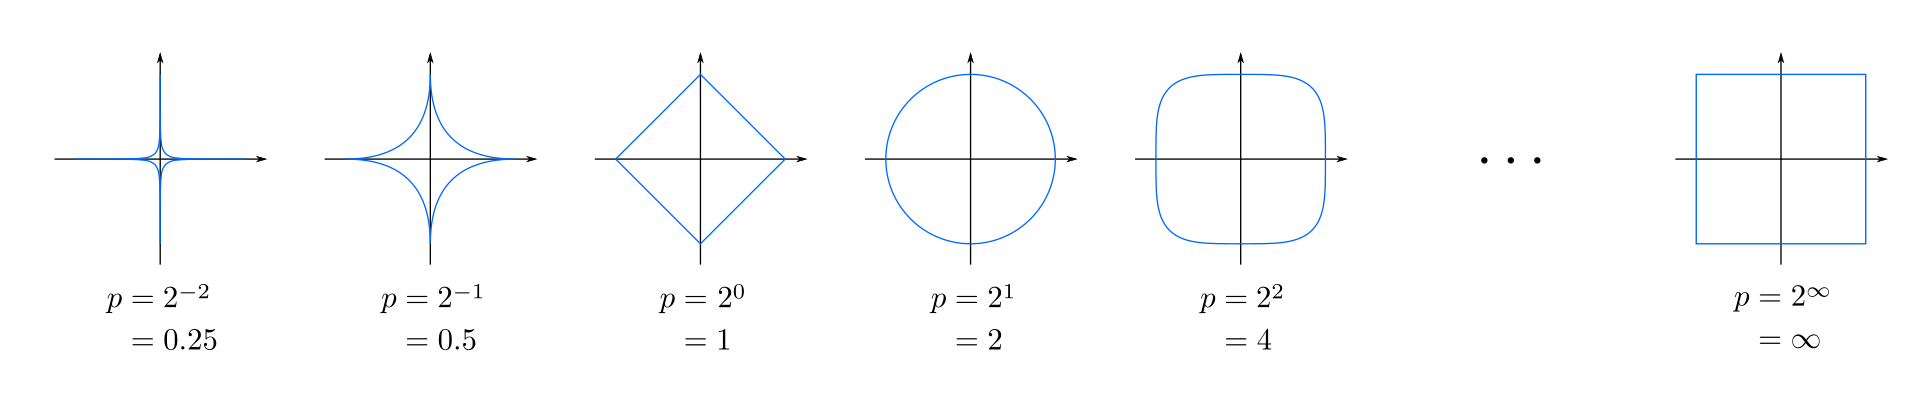
*bron: Wikipedia*

In [112]:
p = 2

np.sum(np.abs(X[..., None] - X[..., None].T)**p, axis=(1))**(1/p)

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

In [114]:
dist = DistanceMetric.get_metric('minkowski', p=10) # implieciet p = 2
dist.pairwise(X, X)

array([[0.        , 2.00039028, 4.02234583, 6.00059583],
       [2.00039028, 0.        , 4.00039083, 7.00000254],
       [4.02234583, 4.00039083, 0.        , 3.0051673 ],
       [6.00059583, 7.00000254, 3.0051673 , 0.        ]])